In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define ImageDataGenerator for both train and val (without validation_split)
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2)
)

# ✅ Load training images
train_generator = datagen.flow_from_directory(
    r"A:\THENMOZHI\vscode\project5\data\train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# ✅ Load validation images
val_generator = datagen.flow_from_directory(
    r"A:\THENMOZHI\vscode\project5\data\val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Build the CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
checkpoint = ModelCheckpoint(
    filepath='models/cnn_model_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint, earlystop, lr_scheduler]
)

c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.2344 - loss: 2.1013
Epoch 1: val_accuracy improved from -inf to 0.53205, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 146s 742ms/step - accuracy: 0.2349 - loss: 2.1001 - val_accuracy: 0.5321 - val_loss: 1.4704 - learning_rate: 1.0000e-04
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.4949 - loss: 1.4550
Epoch 2: val_accuracy improved from 0.53205 to 0.64927, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 156s 796ms/step - accuracy: 0.4950 - loss: 1.4547 - val_accuracy: 0.6493 - val_loss: 1.1752 - learning_rate: 1.0000e-04
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.5878 - loss: 1.2284
Epoch 3: val_accuracy improved from 0.64927 to 0.69139, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 141s 721ms/step - accuracy: 0.5878 - loss: 1.2283 - val_accuracy: 0.6914 - val_loss: 0.9899 - learning_rate: 1.0000e-04
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.6396 - loss: 1.0510
Epoch 4: val_accuracy improved from 0.69139 to 0.72802, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 145s 741ms/step - accuracy: 0.6396 - loss: 1.0509 - val_accuracy: 0.7280 - val_loss: 0.8616 - learning_rate: 1.0000e-04
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.6721 - loss: 0.9572
Epoch 5: val_accuracy did not improve from 0.72802
195/195 ━━━━━━━━━━━━━━━━━━━━ 144s 737ms/step - accuracy: 0.6720 - loss: 0.9572 - val_accuracy: 0.7207 - val_loss: 0.7986 - learning_rate: 1.0000e-04
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.6969 - loss: 0.8738
Epoch 6: val_accuracy improved from 0.72802 to 0.76282, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 130s 666ms/step - accuracy: 0.6969 - loss: 0.8737 - val_accuracy: 0.7628 - val_loss: 0.7098 - learning_rate: 1.0000e-04
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.7356 - loss: 0.7886
Epoch 7: val_accuracy improved from 0.76282 to 0.80861, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 120s 614ms/step - accuracy: 0.7356 - loss: 0.7885 - val_accuracy: 0.8086 - val_loss: 0.6413 - learning_rate: 1.0000e-04
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.7485 - loss: 0.7270
Epoch 8: val_accuracy improved from 0.80861 to 0.83150, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 120s 616ms/step - accuracy: 0.7485 - loss: 0.7269 - val_accuracy: 0.8315 - val_loss: 0.5338 - learning_rate: 1.0000e-04
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.7769 - loss: 0.6556
Epoch 9: val_accuracy improved from 0.83150 to 0.86264, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 119s 607ms/step - accuracy: 0.7769 - loss: 0.6556 - val_accuracy: 0.8626 - val_loss: 0.4828 - learning_rate: 1.0000e-04
Epoch 10/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.7916 - loss: 0.6158
Epoch 10: val_accuracy improved from 0.86264 to 0.87637, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 119s 610ms/step - accuracy: 0.7916 - loss: 0.6158 - val_accuracy: 0.8764 - val_loss: 0.4478 - learning_rate: 1.0000e-04
Epoch 11/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.8057 - loss: 0.5715
Epoch 11: val_accuracy did not improve from 0.87637
195/195 ━━━━━━━━━━━━━━━━━━━━ 119s 611ms/step - accuracy: 0.8057 - loss: 0.5715 - val_accuracy: 0.8764 - val_loss: 0.4098 - learning_rate: 1.0000e-04
Epoch 12/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - accuracy: 0.8235 - loss: 0.5265
Epoch 12: val_accuracy improved from 0.87637 to 0.90201, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 121s 620ms/step - accuracy: 0.8235 - loss: 0.5264 - val_accuracy: 0.9020 - val_loss: 0.3705 - learning_rate: 1.0000e-04
Epoch 13/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8261 - loss: 0.4996
Epoch 13: val_accuracy did not improve from 0.90201
195/195 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.8261 - loss: 0.4995 - val_accuracy: 0.8956 - val_loss: 0.3516 - learning_rate: 1.0000e-04
Epoch 14/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.8487 - loss: 0.4711
Epoch 14: val_accuracy improved from 0.90201 to 0.90476, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 176s 904ms/step - accuracy: 0.8487 - loss: 0.4710 - val_accuracy: 0.9048 - val_loss: 0.3321 - learning_rate: 1.0000e-04
Epoch 15/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.8547 - loss: 0.4353
Epoch 15: val_accuracy improved from 0.90476 to 0.91575, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 187s 959ms/step - accuracy: 0.8546 - loss: 0.4354 - val_accuracy: 0.9158 - val_loss: 0.3137 - learning_rate: 1.0000e-04
Epoch 16/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 861ms/step - accuracy: 0.8594 - loss: 0.4229
Epoch 16: val_accuracy improved from 0.91575 to 0.92582, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 186s 951ms/step - accuracy: 0.8594 - loss: 0.4229 - val_accuracy: 0.9258 - val_loss: 0.2771 - learning_rate: 1.0000e-04
Epoch 17/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 329s/step - accuracy: 0.8692 - loss: 0.3863  
Epoch 17: val_accuracy improved from 0.92582 to 0.92766, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 63812s 329s/step - accuracy: 0.8691 - loss: 0.3863 - val_accuracy: 0.9277 - val_loss: 0.2694 - learning_rate: 1.0000e-04
Epoch 18/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.8807 - loss: 0.3604
Epoch 18: val_accuracy did not improve from 0.92766
195/195 ━━━━━━━━━━━━━━━━━━━━ 138s 705ms/step - accuracy: 0.8806 - loss: 0.3605 - val_accuracy: 0.9048 - val_loss: 0.3065 - learning_rate: 1.0000e-04
Epoch 19/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.8783 - loss: 0.3664
Epoch 19: val_accuracy improved from 0.92766 to 0.93315, saving model to models/cnn_model_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 162s 829ms/step - accuracy: 0.8783 - loss: 0.3664 - val_accuracy: 0.9332 - val_loss: 0.2706 - learning_rate: 1.0000e-04
Epoch 20/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.8884 - loss: 0.3435
Epoch 20: val_accuracy did not improve from 0.93315
195/195 ━━━━━━━━━━━━━━━━━━━━ 157s 807ms/step - accuracy: 0.8884 - loss: 0.3435 - val_accuracy: 0.9332 - val_loss: 0.2674 - learning_rate: 1.0000e-04


In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load VGG16 base model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze base model
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the final model
vgg_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
vgg_model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Save the best model
checkpoint = ModelCheckpoint(
    filepath='models/vgg16_fish_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history_vgg = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1479 - loss: 2.5069
Epoch 1: val_accuracy improved from -inf to 0.20238, saving model to models/vgg16_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1030s 5s/step - accuracy: 0.1480 - loss: 2.5062 - val_accuracy: 0.2024 - val_loss: 2.1167
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2601 - loss: 2.1368
Epoch 2: val_accuracy improved from 0.20238 to 0.44414, saving model to models/vgg16_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1057s 5s/step - accuracy: 0.2602 - loss: 2.1364 - val_accuracy: 0.4441 - val_loss: 1.9417
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3396 - loss: 1.9440
Epoch 3: val_accuracy improved from 0.44414 to 0.57143, saving model to models/vgg16_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1084s 6s/step - accuracy: 0.3397 - loss: 1.9438 - val_accuracy: 0.5714 - val_loss: 1.8068
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4104 - loss: 1.8032
Epoch 4: val_accuracy improved from 0.57143 to 0.62088, saving model to models/vgg16_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 948s 5s/step - accuracy: 0.4105 - loss: 1.8031 - val_accuracy: 0.6209 - val_loss: 1.6892
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4615 - loss: 1.6972
Epoch 5: val_accuracy improved from 0.62088 to 0.64652, saving model to models/vgg16_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 879s 5s/step - accuracy: 0.4616 - loss: 1.6970 - val_accuracy: 0.6465 - val_loss: 1.5921


In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load MobileNetV2 base model
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build model
mobilenet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
mobilenet_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Save best model
checkpoint = ModelCheckpoint(
    filepath='models/mobilenetv2_fish_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the model
history_mobilenet = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,  # ✅ Same approach as VGG16
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.2730 - loss: 2.2616
Epoch 1: val_accuracy improved from -inf to 0.80586, saving model to models/mobilenetv2_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 142s 715ms/step - accuracy: 0.2738 - loss: 2.2590 - val_accuracy: 0.8059 - val_loss: 0.8592
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.7094 - loss: 0.9108
Epoch 2: val_accuracy improved from 0.80586 to 0.91758, saving model to models/mobilenetv2_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 138s 706ms/step - accuracy: 0.7095 - loss: 0.9103 - val_accuracy: 0.9176 - val_loss: 0.4613
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.8224 - loss: 0.5976
Epoch 3: val_accuracy improved from 0.91758 to 0.94505, saving model to models/mobilenetv2_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 684ms/step - accuracy: 0.8224 - loss: 0.5974 - val_accuracy: 0.9451 - val_loss: 0.3200
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.8674 - loss: 0.4426
Epoch 4: val_accuracy did not improve from 0.94505
195/195 ━━━━━━━━━━━━━━━━━━━━ 127s 651ms/step - accuracy: 0.8674 - loss: 0.4425 - val_accuracy: 0.9396 - val_loss: 0.2648
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.8927 - loss: 0.3675
Epoch 5: val_accuracy improved from 0.94505 to 0.96154, saving model to models/mobilenetv2_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 132s 676ms/step - accuracy: 0.8928 - loss: 0.3674 - val_accuracy: 0.9615 - val_loss: 0.1995


In [9]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load EfficientNetB0 base model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Final model
efficient_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
efficient_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Save best model
checkpoint = ModelCheckpoint(
    filepath='models/efficientnetb0_fish_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history_efficientnet = efficient_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.1468 - loss: 2.3595
Epoch 1: val_accuracy improved from -inf to 0.17125, saving model to models/efficientnetb0_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 126s 616ms/step - accuracy: 0.1468 - loss: 2.3594 - val_accuracy: 0.1712 - val_loss: 2.3212
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.1621 - loss: 2.3308
Epoch 2: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 135s 693ms/step - accuracy: 0.1621 - loss: 2.3308 - val_accuracy: 0.1712 - val_loss: 2.3194
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - accuracy: 0.1650 - loss: 2.3281
Epoch 3: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 130s 663ms/step - accuracy: 0.1650 - loss: 2.3281 - val_accuracy: 0.1712 - val_loss: 2.3156
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.1605 - loss: 2.3226
Epoch 4: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 134s 687ms/step - accuracy: 0.1605 - loss: 2.3226 - val_accuracy: 0.1712 - val_loss: 2.3157
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.1651 - loss: 2.3214
Epoch 5: val_ac

In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load ResNet50 base model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build model
resnet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
resnet_model.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Save best checkpoint
checkpoint = ModelCheckpoint(
    filepath='models/resnet50_fish_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 943ms/step - accuracy: 0.1263 - loss: 2.5141
Epoch 1: val_accuracy improved from -inf to 0.17125, saving model to models/resnet50_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.1264 - loss: 2.5135 - val_accuracy: 0.1712 - val_loss: 2.2904
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1746 - loss: 2.2981
Epoch 2: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.1746 - loss: 2.2980 - val_accuracy: 0.1712 - val_loss: 2.2647
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1852 - loss: 2.2721
Epoch 3: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.1851 - loss: 2.2720 - val_accuracy: 0.1658 - val_loss: 2.2551
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1868 - loss: 2.2528
Epoch 4: val_accuracy did not improve from 0.17125
195/195 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.1868 - loss: 2.2528 - val_accuracy: 0.1621 - val_loss: 2.2305
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1896 - loss: 2.2319
Epoch 5: val_accuracy improved from 0.1

195/195 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.1896 - loss: 2.2319 - val_accuracy: 0.1767 - val_loss: 2.2181


In [11]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load InceptionV3 base model
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Final model
inception_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
inception_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Save best checkpoint
checkpoint = ModelCheckpoint(
    filepath='models/inceptionv3_fish_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train
history_inception = inception_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.3127 - loss: 2.1240
Epoch 1: val_accuracy improved from -inf to 0.80037, saving model to models/inceptionv3_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 154s 769ms/step - accuracy: 0.3135 - loss: 2.1215 - val_accuracy: 0.8004 - val_loss: 0.8456
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.6939 - loss: 0.9560
Epoch 2: val_accuracy improved from 0.80037 to 0.87821, saving model to models/inceptionv3_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 161s 824ms/step - accuracy: 0.6942 - loss: 0.9554 - val_accuracy: 0.8782 - val_loss: 0.4833
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.8171 - loss: 0.6095
Epoch 3: val_accuracy improved from 0.87821 to 0.91484, saving model to models/inceptionv3_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 170s 873ms/step - accuracy: 0.8171 - loss: 0.6095 - val_accuracy: 0.9148 - val_loss: 0.3757
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8498 - loss: 0.5098
Epoch 4: val_accuracy improved from 0.91484 to 0.91850, saving model to models/inceptionv3_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1035s 5s/step - accuracy: 0.8498 - loss: 0.5097 - val_accuracy: 0.9185 - val_loss: 0.3159
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 916ms/step - accuracy: 0.8495 - loss: 0.4601
Epoch 5: val_accuracy improved from 0.91850 to 0.93315, saving model to models/inceptionv3_fish_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.8496 - loss: 0.4599 - val_accuracy: 0.9332 - val_loss: 0.2694


In [12]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model_path, val_generator):
    print(f"\n📦 Evaluation Report for {model_path}")

    # Load model
    model = load_model(model_path)

    # Predict
    Y_pred = model.predict(val_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = val_generator.classes
    class_labels = list(val_generator.class_indices.keys())

    # Classification Report
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(f'Confusion Matrix: {model_path}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



📦 Evaluation Report for models/vgg16_fish_best.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step
                                  precision    recall  f1-score   support

                     animal fish       0.77      0.99      0.87       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.57      0.74      0.64       105
   fish sea_food gilt_head_bream       0.64      0.48      0.55        94
   fish sea_food hourse_mackerel       0.83      0.46      0.60        97
        fish sea_food red_mullet       0.46      0.63      0.53        90
     fish sea_food red_sea_bream       0.63      0.80      0.71       113
          fish sea_food sea_bass       0.76      0.45      0.57        97
            fish sea_food shrimp       0.75      0.82      0.78       100
fish sea_food striped_red_mullet       0.55      0.31      0.39       101
             fish sea_food trout       0.78      0.82      0.80        98

                        accuracy                           0.67      1

c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

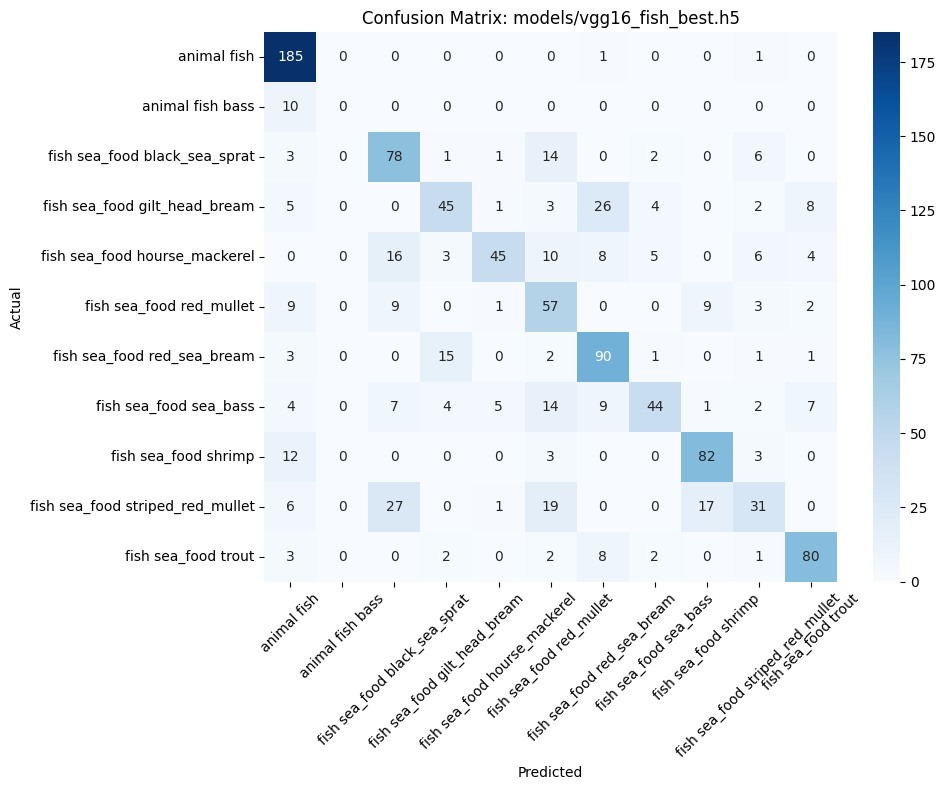


📦 Evaluation Report for models/mobilenetv2_fish_best.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 588ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.94      0.96      0.95       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.96      0.96      0.96       105
   fish sea_food gilt_head_bream       0.96      1.00      0.98        94
   fish sea_food hourse_mackerel       0.96      0.97      0.96        97
        fish sea_food red_mullet       0.95      0.97      0.96        90
     fish sea_food red_sea_bream       0.99      0.99      0.99       113
          fish sea_food sea_bass       0.95      0.95      0.95        97
            fish sea_food shrimp       0.97      0.99      0.98       100
fish sea_food striped_red_mullet       0.93      0.89      0.91       101
             fish sea_food trout       0.95      0.96      0.95        98

                        accuracy                           0.96     

c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

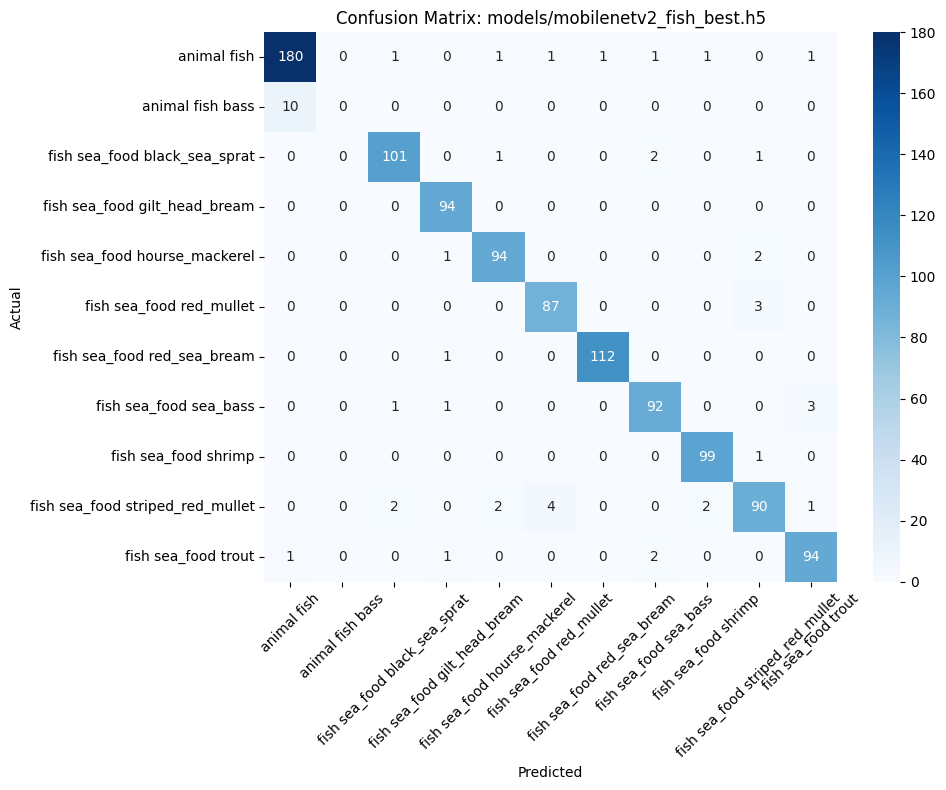


📦 Evaluation Report for models/efficientnetb0_fish_best.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 622ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.17      1.00      0.29       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.00      0.00      0.00        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accuracy                           0.17     

c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

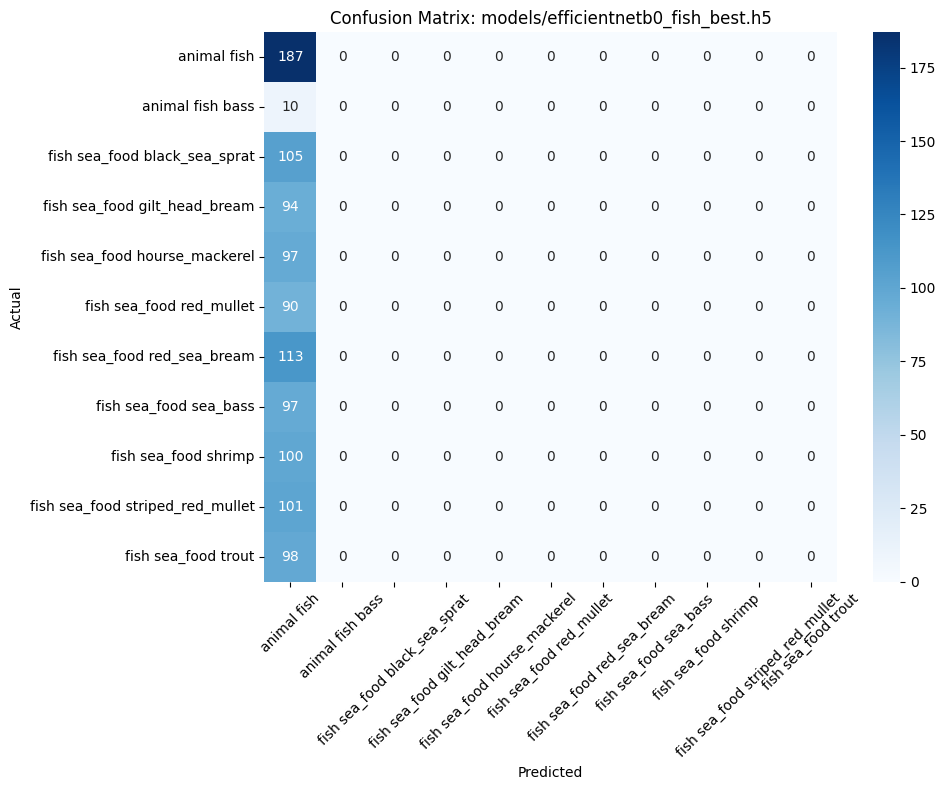


📦 Evaluation Report for models/resnet50_fish_best.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step
                                  precision    recall  f1-score   support

                     animal fish       0.22      0.83      0.34       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.00      0.00      0.00       105
   fish sea_food gilt_head_bream       0.14      0.33      0.19        94
   fish sea_food hourse_mackerel       0.00      0.00      0.00        97
        fish sea_food red_mullet       0.17      0.26      0.20        90
     fish sea_food red_sea_bream       0.00      0.00      0.00       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.00      0.00      0.00       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.00      0.00      0.00        98

                        accuracy                           0.19      10

c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

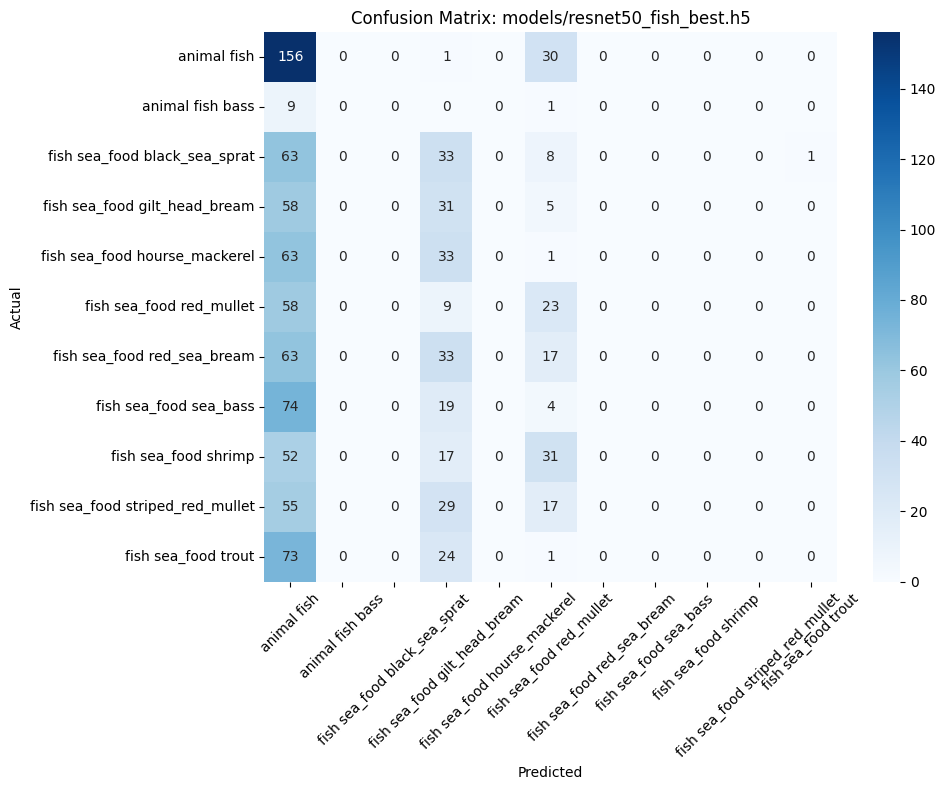


📦 Evaluation Report for models/inceptionv3_fish_best.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step
                                  precision    recall  f1-score   support

                     animal fish       0.93      0.98      0.96       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.95      0.96      0.96       105
   fish sea_food gilt_head_bream       0.94      0.95      0.94        94
   fish sea_food hourse_mackerel       0.86      0.98      0.91        97
        fish sea_food red_mullet       0.85      0.89      0.87        90
     fish sea_food red_sea_bream       0.97      0.92      0.95       113
          fish sea_food sea_bass       0.97      0.89      0.92        97
            fish sea_food shrimp       1.00      1.00      1.00       100
fish sea_food striped_red_mullet       0.89      0.80      0.84       101
             fish sea_food trout       0.95      0.98      0.96        98

                        accuracy                           0.93      10

c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

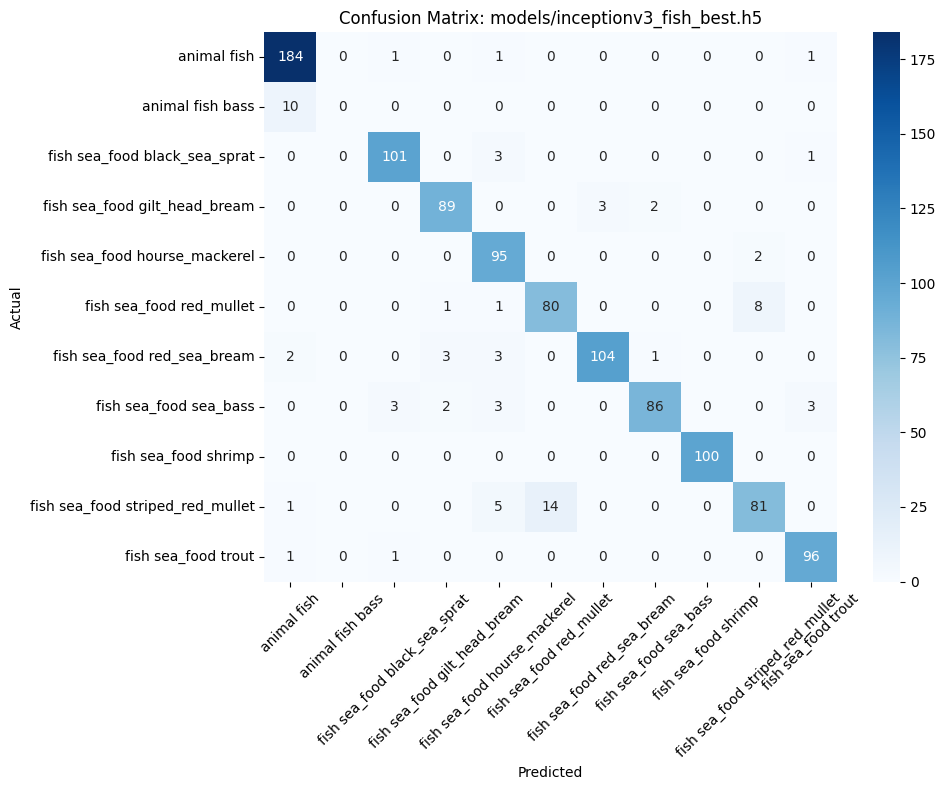

In [13]:
evaluate_model("models/vgg16_fish_best.h5", val_generator)
evaluate_model("models/mobilenetv2_fish_best.h5", val_generator)
evaluate_model("models/efficientnetb0_fish_best.h5", val_generator)
evaluate_model("models/resnet50_fish_best.h5", val_generator)
evaluate_model("models/inceptionv3_fish_best.h5", val_generator)

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# 1. Load your best pretrained model
model = load_model('models/mobilenetv2_fish_best.h5')

# 2. Unfreeze some top layers of base model
model.trainable = True
for layer in model.layers[:-30]:  # Freeze all except the last ~30 layers
    layer.trainable = False

# 3. Re-compile with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Smaller LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Setup callbacks
checkpoint = ModelCheckpoint(
    filepath='models/mobilenetv2_fish_finetuned.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 5. Train the fine-tuned model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint, lr_scheduler, earlystop]
)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.9067 - loss: 0.3060
Epoch 1: val_accuracy improved from -inf to 0.95238, saving model to models/mobilenetv2_fish_finetuned.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 137s 692ms/step - accuracy: 0.9067 - loss: 0.3059 - val_accuracy: 0.9524 - val_loss: 0.2084 - learning_rate: 1.0000e-05
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9173 - loss: 0.2956
Epoch 2: val_accuracy improved from 0.95238 to 0.96520, saving model to models/mobilenetv2_fish_finetuned.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 100s 512ms/step - accuracy: 0.9173 - loss: 0.2956 - val_accuracy: 0.9652 - val_loss: 0.1907 - learning_rate: 1.0000e-05
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9149 - loss: 0.2890
Epoch 3: val_accuracy improved from 0.96520 to 0.96886, saving model to models/mobilenetv2_fish_finetuned.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 100s 511ms/step - accuracy: 0.9150 - loss: 0.2890 - val_accuracy: 0.9689 - val_loss: 0.1643 - learning_rate: 1.0000e-05
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.9100 - loss: 0.2968
Epoch 4: val_accuracy did not improve from 0.96886
195/195 ━━━━━━━━━━━━━━━━━━━━ 102s 521ms/step - accuracy: 0.9101 - loss: 0.2967 - val_accuracy: 0.9570 - val_loss: 0.1907 - learning_rate: 1.0000e-05
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.9113 - loss: 0.2955
Epoch 5: val_accuracy did not improve from 0.96886
195/195 ━━━━━━━━━━━━━━━━━━━━ 103s 530ms/step - accuracy: 0.9113 - loss: 0.2954 - val_accuracy: 0.9579 - val_loss: 0.1802 - learning_rate: 1.0000e-05
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.9207 - loss: 0.2705
Epoch 6: val_accuracy did not improve from 0.96886

Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
195/195 ━━━━━━━━━━━━━━━━━━━━ 103s 526ms/step - accuracy: 0.


📦 Evaluation Report for models/mobilenetv2_fish_finetuned.h5


35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 435ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.95      0.97      0.96       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.98      0.97      0.98       105
   fish sea_food gilt_head_bream       0.95      0.94      0.94        94
   fish sea_food hourse_mackerel       0.95      0.99      0.97        97
        fish sea_food red_mullet       0.93      0.98      0.95        90
     fish sea_food red_sea_bream       0.97      0.98      0.97       113
          fish sea_food sea_bass       0.97      0.95      0.96        97
            fish sea_food shrimp       0.98      1.00      0.99       100
fish sea_food striped_red_mullet       0.97      0.90      0.93       101
             fish sea_food trout       0.97      1.00      0.98        98

                        accuracy                           0.96     

c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

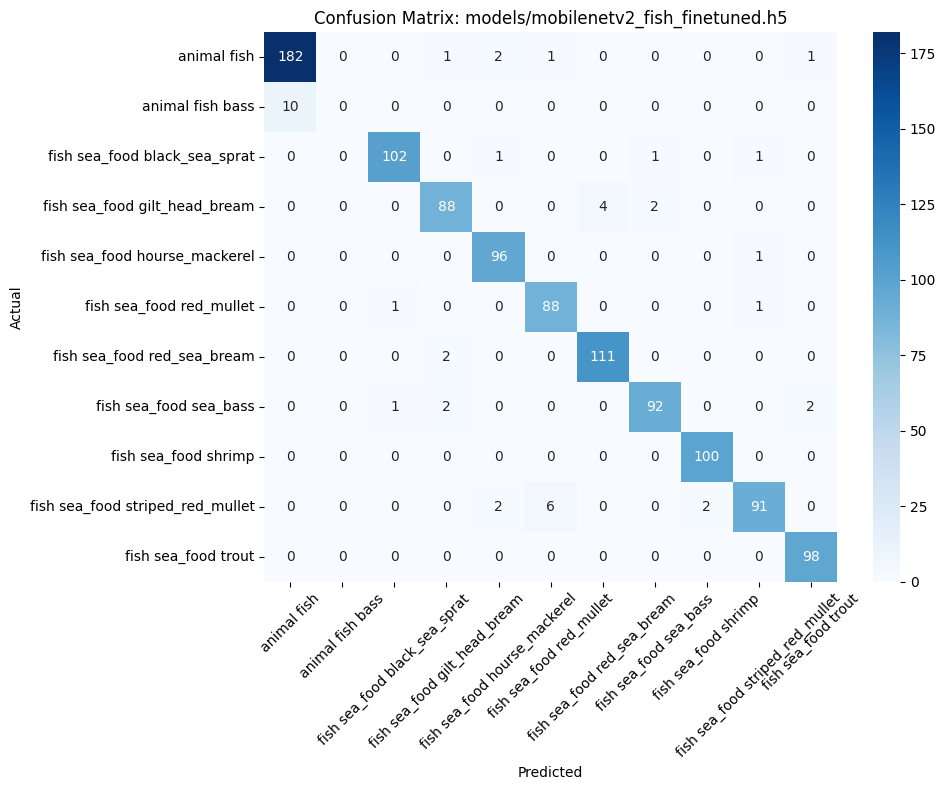

In [15]:
evaluate_model("models/mobilenetv2_fish_finetuned.h5", val_generator)

In [16]:
import shutil
shutil.copy("models/mobilenetv2_fish_finetuned.h5", "models/best_model.h5")

'models/best_model.h5'

In [19]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

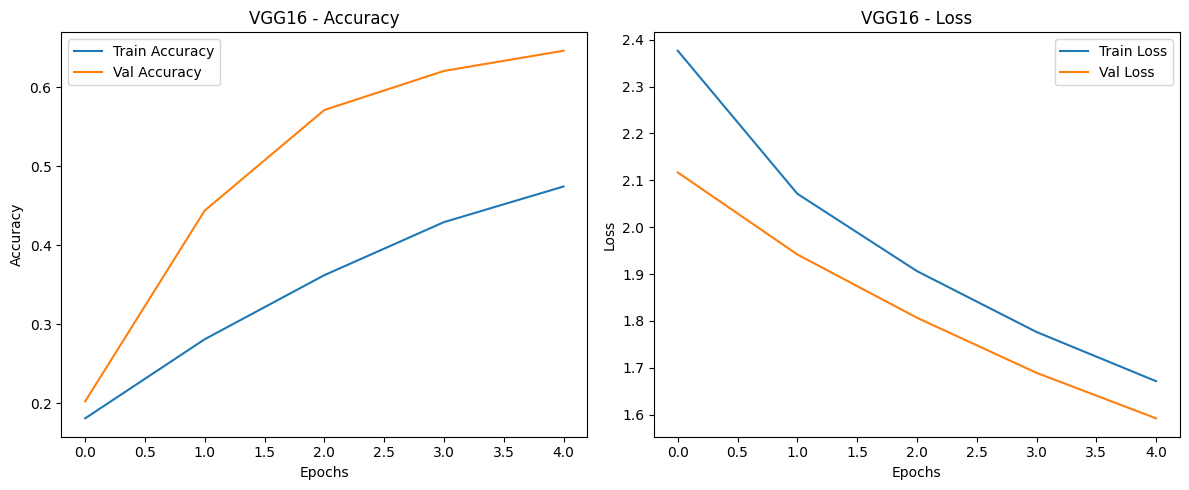

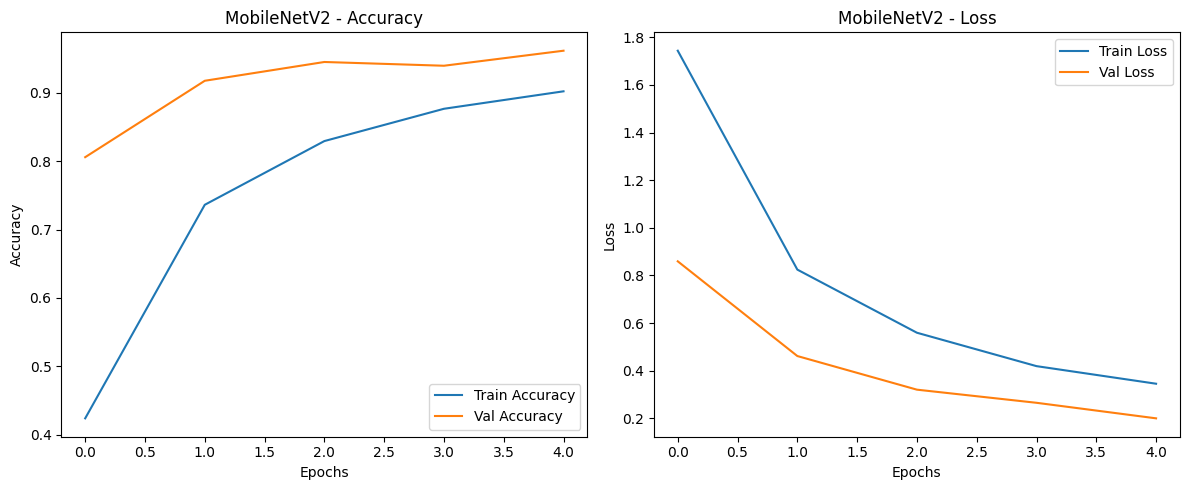

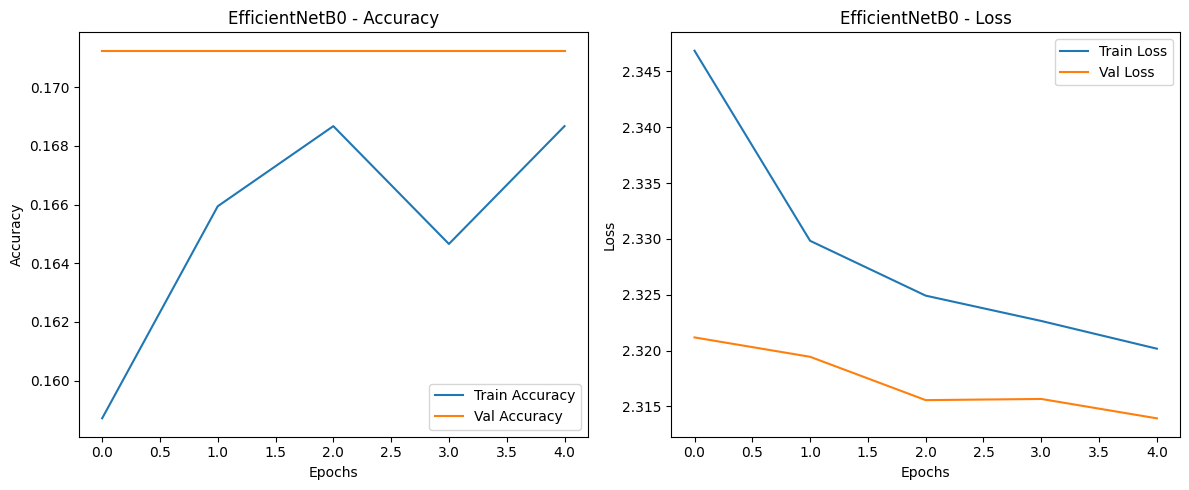

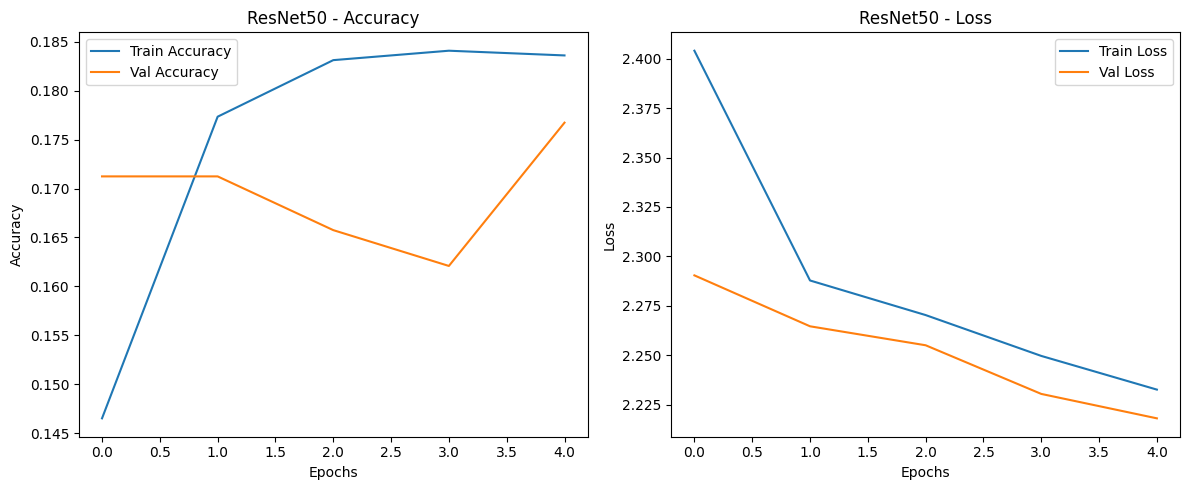

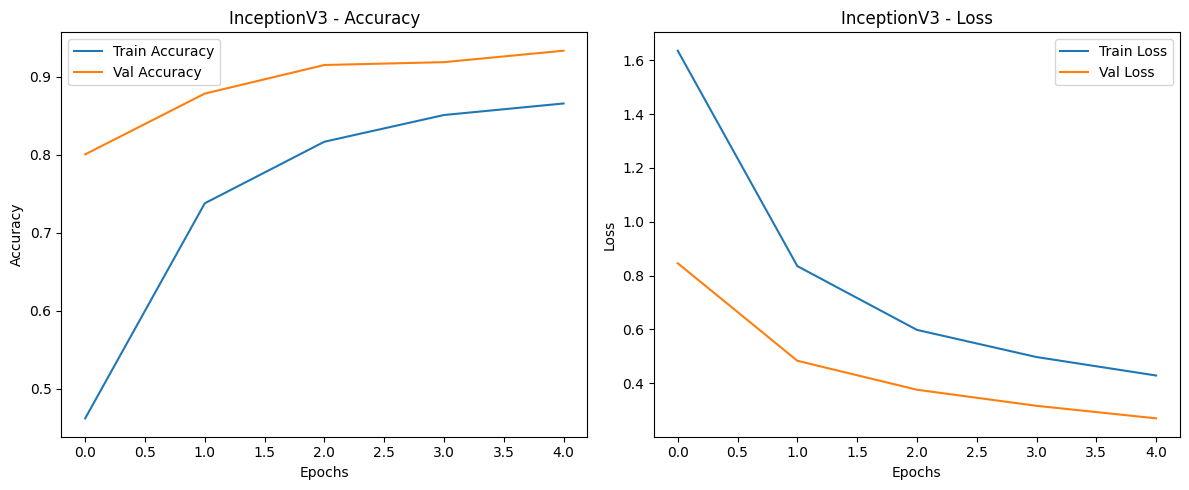

In [20]:
plot_training_history(history_vgg, "VGG16")
plot_training_history(history_mobilenet, "MobileNetV2")
plot_training_history(history_efficientnet, "EfficientNetB0")
plot_training_history(history_resnet, "ResNet50")
plot_training_history(history_inception, "InceptionV3")